In this notebook, we express CNOT using native gates for Heisenberg XXX interaction


In [16]:
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.quantum_info.operators import Operator
from qiskit import *
import numpy as np

Set up two qubits

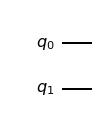

In [17]:
qbits = QuantumCircuit(2)
qbits.draw('mpl')

Define the HeisGate on two qubits by ${\rm HEIS}(\alpha) = e^{- i \alpha/4} e^{- i \alpha \bf{S}^{(1)}\cdot\bf{S}^{(2)}}$,

In [3]:
def Heis_gate(alpha):
    return np.array([
            [np.exp(- 1.0j * alpha/2),  0.0, 0.0,  0.0],
            [0.0,  np.cos(alpha/2), -1.0j * np.sin(alpha/2),  0.0],
            [0.0,  -1.0j * np.sin(alpha/2), np.cos(alpha/2),  0.0],
            [0.0,  0.0, 0.0, np.exp(- 1.0j * alpha/2)]
            ])

In [4]:
np.around(Heis_gate(np.pi),4)

array([[0.-1.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j],
       [0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j]])

Check unitarity of ${\rm HEIS}(\alpha)$

In [5]:
alpha=np.pi/7

#print(np.around(Unit_Heis,4))
#print("")
Unit_Heis = Heis_gate(alpha)
Unit_Heis_dag=np.conj(Heis_gate(alpha).T)

# print(np.around(Unit_Heis_dag,4))
# print("")

print("Product Conjugate[HEIS(alpha) times HEIS(alpha)")
print()
print(np.around(np.dot(Unit_Heis,Unit_Heis_dag),2))

Product Conjugate[HEIS(alpha) times HEIS(alpha)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


Note that ${\rm HEIS}(\pi/2)$ represents the square root of SWAP

In [6]:
alpha=np.pi/2

print("HEIS gate at alpha = pi/2")
print()
print(np.around(Heis_gate(alpha),4))
print()

print("Taking the square")
print()
print(np.around(np.dot(Heis_gate(alpha),Heis_gate(alpha)),2))

HEIS gate at alpha = pi/2

[[0.7071-0.7071j 0.    +0.j     0.    +0.j     0.    +0.j    ]
 [0.    +0.j     0.7071+0.j     0.    -0.7071j 0.    +0.j    ]
 [0.    +0.j     0.    -0.7071j 0.7071+0.j     0.    +0.j    ]
 [0.    +0.j     0.    +0.j     0.    +0.j     0.7071-0.7071j]]

Taking the square

[[0.-1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.-1.j]]


Now build a circuit that compiles CNOT into native gates for Heisenberg spin qubits

In [10]:
qbits = QuantumCircuit(2) 
Heis_gate_op = Operator(Heis_gate(np.pi/2))
qbits.h(1)
qbits.unitary(Heis_gate_op,[0,1], label = 'Sqrt(HEIS)')
qbits.z(0)
qbits.unitary(Heis_gate_op,[0,1], label = 'Sqrt(HEIS)')
qbits.s(0)
qbits.s(1)
qbits.z(1) 
qbits.h(1)


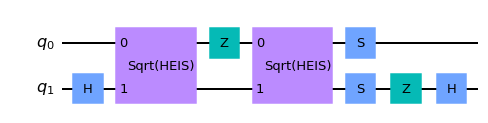

In [11]:
qbits.draw('mpl')

Extract representation as unitary matrix to check that this acts as CNOT

In [12]:
usim = Aer.get_backend('unitary_simulator')

job = execute(qbits,usim)
result = job.result()

print(result.get_unitary(qbits, decimals=3))

Operator([[-0.-1.j, -0.+0.j, -0.+0.j, -0.+0.j],
          [ 0.+0.j,  0.+0.j, -0.+0.j, -0.-1.j],
          [ 0.+0.j,  0.-0.j, -0.-1.j,  0.-0.j],
          [ 0.+0.j, -0.-1.j, -0.+0.j,  0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


With CNOT added the circuit acts as the identity

In [13]:
qnew = qbits.cx(0,1)

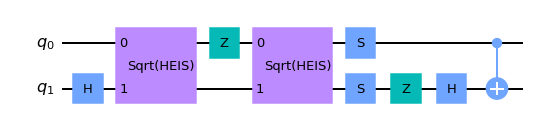

In [14]:
qbits.draw('mpl')

In [15]:
job = execute(qbits,usim)
result = job.result()

print(result.get_unitary(qbits, decimals=3))

Operator([[-0.-1.j, -0.+0.j, -0.+0.j, -0.+0.j],
          [ 0.+0.j, -0.-1.j, -0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.-0.j, -0.-1.j,  0.-0.j],
          [ 0.+0.j,  0.+0.j, -0.+0.j, -0.-1.j]],
         input_dims=(2, 2), output_dims=(2, 2))
